# Logistic Regression

Dataset link: https://drive.google.com/file/d/1sx4IbR4DIt9DS04wu4hpHXbrsdka6l8q/view?usp=sharing

This notebook link: https://shorturl.at/5nZlX

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [ ]:
# load the breast cancer dataset
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
df=pd.DataFrame(cancer.data,columns=cancer.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.shape

(569, 30)

In [ ]:
df['target'] = cancer.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
features = df.drop(['target'],axis=1) # this is also know as independent variables
target= df['target'] # this is also know as dependent variables

In [ ]:
features.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
216,11.89,18.35,77.32,432.2,0.09363,0.11540,0.06636,0.03142,0.1967,0.06314,...,13.25,27.10,86.20,531.2,0.1405,0.3046,0.28060,0.11380,0.3397,0.08365
324,12.20,15.21,78.01,457.9,0.08673,0.06545,0.01994,0.01692,0.1638,0.06129,...,13.75,21.38,91.11,583.1,0.1256,0.1928,0.11670,0.05556,0.2661,0.07961
529,12.07,13.44,77.83,445.2,0.11000,0.09009,0.03781,0.02798,0.1657,0.06608,...,13.45,15.77,86.92,549.9,0.1521,0.1632,0.16220,0.07393,0.2781,0.08052
158,12.06,12.74,76.84,448.6,0.09311,0.05241,0.01972,0.01963,0.1590,0.05907,...,13.14,18.41,84.08,532.8,0.1275,0.1232,0.08636,0.07025,0.2514,0.07898
256,19.55,28.77,133.60,1207.0,0.09260,0.20630,0.17840,0.11440,0.1893,0.06232,...,25.05,36.27,178.60,1926.0,0.1281,0.5329,0.42510,0.19410,0.2818,0.10050


In [ ]:
target.sample(4)

,target
175,1
316,1
202,0
508,1


In [ ]:
features.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(455, 30)

In [ ]:
X_test.shape

(114, 30)

In [ ]:
clf = LogisticRegression()

# clf = LogisticRegression(max_iter=4000)

In [ ]:
clf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [ ]:
clf.score(X_test,y_test)

0.956140350877193

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc



1.   The ROC curve is a graphical representation that illustrates the performance of a binary classification model across different thresholds.
2.   The AUC is a scalar value representing the area under the ROC curve.

AUC = 1: Perfect classifier.

AUC = 0.5: No discrimination (random guessing).

AUC < 0.5: Worse than random.



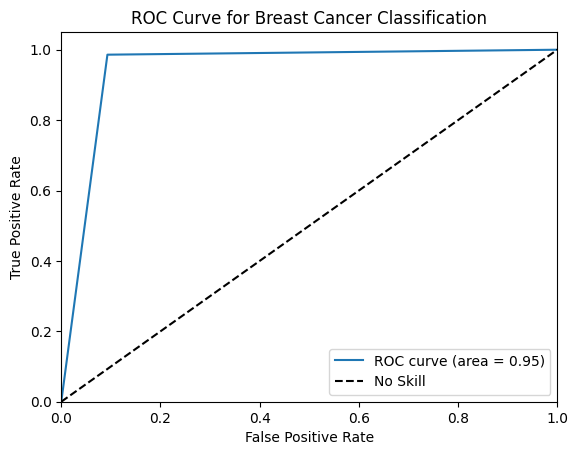

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Breast Cancer Classification')
plt.legend()
plt.show()

In [ ]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [ ]:
# let's try by selecting only some of the features and how they react

In [ ]:
df1 = df[['mean fractal dimension','worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity','target']]

In [ ]:
df2 = df[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error','target']]

In [ ]:
df1.head(3)

,mean fractal dimension,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,target
0,0.07871,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0
1,0.05667,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0
2,0.05999,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0


In [ ]:
X = df1.drop(['target'],axis=1)
y= df1['target']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
clf = LogisticRegression(max_iter=3000)
clf.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
clf.score(X_test,y_test)

0.9210526315789473

In [ ]:
3# for imbalanced dataset precision, recall, F1-score, or AUC-ROC should also be considered.

# Kmeans



1.   Decide the number of centroid (set the value for K)
2.   Initialize the centroid
3.   Assign cluster
4.   relocate the cluster
5.   finish




##### import necessary packages

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler # mean 0, standard deviation 1
from sklearn.cluster import KMeans
import numpy as np

##### import dataset

In [ ]:
df=pd.read_csv("marketing.csv")

In [ ]:
df.sample(5)

,Unnamed: 0,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,joined_days,Age,Living_With,Children,Family_Size,Is_Parent
1886,1886,Postgraduate,44155.0,24,22,1,9,0,0,14,...,1,1,2,4,3960,67,Partner,2,4,1
1360,1360,Graduate,58554.0,55,368,24,68,38,0,88,...,8,2,6,7,4684,56,Partner,2,4,1
847,847,Postgraduate,55284.0,60,547,7,140,0,7,63,...,7,5,8,5,4686,68,Alone,1,2,1
6,6,Graduate,55635.0,34,235,65,164,50,49,27,...,7,3,7,6,4697,53,Alone,1,2,1
811,811,Graduate,21359.0,1,12,2,17,6,1,10,...,2,0,3,8,4324,52,Alone,1,2,1


In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
df.head()

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,joined_days,Age,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,4706,67,Alone,0,1,0
1,Graduate,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,3971,70,Alone,2,3,1
2,Graduate,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,4323,59,Partner,0,2,0
3,Graduate,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,3969,40,Partner,1,3,1
4,Postgraduate,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,3960,43,Partner,1,3,1


 ##### analyzing columns

In [ ]:

# for i in df.columns:
#     print(f"unique value of {i}:{df[i].unique()}")

#     print("...........")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Income               2240 non-null   float64
 2   Recency              2240 non-null   int64  
 3   Wines                2240 non-null   int64  
 4   Fruits               2240 non-null   int64  
 5   Meat                 2240 non-null   int64  
 6   Fish                 2240 non-null   int64  
 7   Sweets               2240 non-null   int64  
 8   Gold                 2240 non-null   int64  
 9   NumDealsPurchases    2240 non-null   int64  
 10  NumWebPurchases      2240 non-null   int64  
 11  NumCatalogPurchases  2240 non-null   int64  
 12  NumStorePurchases    2240 non-null   int64  
 13  NumWebVisitsMonth    2240 non-null   int64  
 14  joined_days          2240 non-null   int64  
 15  Age                  2240 non-null   i

##### Introduction to Labelencoder and one hot encoding

###### education is ordinal(hierarchy on PHD masters etc) data hence we prefer label encoding

In [ ]:
df['Education'].unique()  # Before using the label encoder

array(['Graduate', 'Postgraduate', 'Undergraduate'], dtype=object)

In [ ]:
df_new=df
label_encoder = LabelEncoder()
df_new['Education'] = label_encoder.fit_transform(df_new['Education'])

In [ ]:
df['Education'].unique()  # label encoder effect

array([0, 1, 2])

In [ ]:
df_new.sample(10)

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,joined_days,Age,Living_With,Children,Family_Size,Is_Parent
254,0,75702.0,77,650,28,353,45,42,30,5,4,6,11,8,4681,57,Partner,2,4,1
1362,0,53034.0,30,160,15,196,15,11,50,8,6,1,7,8,4314,50,Alone,2,3,1
633,2,32218.0,27,10,24,15,13,1,30,1,2,1,3,7,3964,64,Alone,0,1,0
419,1,49505.0,4,604,0,100,19,0,28,9,10,2,8,8,4339,53,Partner,2,4,1
1258,0,39356.0,21,15,0,2,0,0,6,1,1,0,2,6,3960,48,Partner,2,4,1
1290,0,15759.0,12,1,2,5,6,0,3,1,1,0,2,7,4339,68,Partner,0,2,0
729,0,89891.0,17,412,22,132,59,28,183,1,11,6,8,4,4329,33,Partner,0,2,0
172,0,50447.0,4,85,7,24,2,3,27,1,3,1,3,6,3958,54,Partner,2,4,1
1394,1,29791.0,21,14,0,6,0,0,0,2,2,0,3,5,3964,52,Partner,1,3,1
361,1,62187.0,38,512,0,83,0,0,41,3,6,2,10,4,3957,55,Alone,1,2,1


###### living with is nominal data (Categorical)hence we prefer get_dummies

In [ ]:
df_new = pd.get_dummies(df_new, columns=['Living_With'], drop_first=False)

In [ ]:
df_new

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,joined_days,Age,Children,Family_Size,Is_Parent,Living_With_Alone,Living_With_Partner
0,0,58138.0,58,635,88,546,172,88,88,3,...,10,4,7,4706,67,0,1,0,True,False
1,0,46344.0,38,11,1,6,2,1,6,2,...,1,2,5,3971,70,2,3,1,True,False
2,0,71613.0,26,426,49,127,111,21,42,1,...,2,10,4,4323,59,0,2,0,False,True
3,0,26646.0,26,11,4,20,10,3,5,2,...,0,4,6,3969,40,1,3,1,False,True
4,1,58293.0,94,173,43,118,46,27,15,5,...,3,6,5,3960,43,1,3,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,46,709,43,182,42,118,247,2,...,3,4,5,4331,57,1,3,1,False,True
2236,1,64014.0,56,406,0,30,0,0,8,7,...,2,5,7,3969,78,3,5,1,False,True
2237,0,56981.0,91,908,48,217,32,12,24,1,...,3,13,6,3954,43,0,1,0,True,False
2238,1,69245.0,8,428,30,214,80,30,61,2,...,5,10,3,3955,68,1,3,1,False,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   int64  
 1   Income               2240 non-null   float64
 2   Recency              2240 non-null   int64  
 3   Wines                2240 non-null   int64  
 4   Fruits               2240 non-null   int64  
 5   Meat                 2240 non-null   int64  
 6   Fish                 2240 non-null   int64  
 7   Sweets               2240 non-null   int64  
 8   Gold                 2240 non-null   int64  
 9   NumDealsPurchases    2240 non-null   int64  
 10  NumWebPurchases      2240 non-null   int64  
 11  NumCatalogPurchases  2240 non-null   int64  
 12  NumStorePurchases    2240 non-null   int64  
 13  NumWebVisitsMonth    2240 non-null   int64  
 14  joined_days          2240 non-null   int64  
 15  Age                  2240 non-null   i

In [ ]:
#  Living_With has been handled as boolean but still it acts as an object. so we change it to int

In [ ]:
df_new['Living_With_Partner'] = df_new['Living_With_Partner'].astype(int)
df_new['Living_With_Alone'] = df_new['Living_With_Alone'].astype(int)

In [ ]:
df_new.sample(5)

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,joined_days,Age,Children,Family_Size,Is_Parent,Living_With_Alone,Living_With_Partner
965,0,54753.0,87,197,107,227,7,59,131,3,...,2,11,4,4332,65,1,3,1,0,1
1568,1,55517.0,53,483,0,108,0,6,36,5,...,1,6,9,4683,74,2,4,1,0,1
1183,2,15056.0,76,6,12,3,21,6,40,5,...,2,3,5,4341,66,2,3,1,1,0
1171,2,20130.0,99,0,6,3,7,6,12,1,...,0,3,8,3962,50,0,2,0,0,1
1821,1,44635.0,25,56,0,9,0,0,3,2,...,0,3,7,4333,53,2,3,1,1,0


In [ ]:
df_new.shape

(2240, 21)

##### model definition and fitting

In [ ]:
# let's test with number of clusters = 3

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_new['Cluster'] = kmeans.fit_predict(df_new)
# adding new column 'Cluster'in the data frame represeting cluster category of each data point

In [ ]:
df_new

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,...,NumStorePurchases,NumWebVisitsMonth,joined_days,Age,Children,Family_Size,Is_Parent,Living_With_Alone,Living_With_Partner,Cluster
0,0,58138.0,58,635,88,546,172,88,88,3,...,4,7,4706,67,0,1,0,1,0,0
1,0,46344.0,38,11,1,6,2,1,6,2,...,2,5,3971,70,2,3,1,1,0,0
2,0,71613.0,26,426,49,127,111,21,42,1,...,10,4,4323,59,0,2,0,0,1,1
3,0,26646.0,26,11,4,20,10,3,5,2,...,4,6,3969,40,1,3,1,0,1,2
4,1,58293.0,94,173,43,118,46,27,15,5,...,6,5,3960,43,1,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,46,709,43,182,42,118,247,2,...,4,5,4331,57,1,3,1,0,1,0
2236,1,64014.0,56,406,0,30,0,0,8,7,...,5,7,3969,78,3,5,1,0,1,0
2237,0,56981.0,91,908,48,217,32,12,24,1,...,13,6,3954,43,0,1,0,1,0,0
2238,1,69245.0,8,428,30,214,80,30,61,2,...,10,3,3955,68,1,3,1,0,1,1


In [ ]:
# number of clusters = 3 was used for demo purpose
# let's optimize by value of clusters (k)

In [ ]:
X=df_new.drop(columns='Cluster',axis=1)
X

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,joined_days,Age,Children,Family_Size,Is_Parent,Living_With_Alone,Living_With_Partner
0,0,58138.0,58,635,88,546,172,88,88,3,...,10,4,7,4706,67,0,1,0,1,0
1,0,46344.0,38,11,1,6,2,1,6,2,...,1,2,5,3971,70,2,3,1,1,0
2,0,71613.0,26,426,49,127,111,21,42,1,...,2,10,4,4323,59,0,2,0,0,1
3,0,26646.0,26,11,4,20,10,3,5,2,...,0,4,6,3969,40,1,3,1,0,1
4,1,58293.0,94,173,43,118,46,27,15,5,...,3,6,5,3960,43,1,3,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,46,709,43,182,42,118,247,2,...,3,4,5,4331,57,1,3,1,0,1
2236,1,64014.0,56,406,0,30,0,0,8,7,...,2,5,7,3969,78,3,5,1,0,1
2237,0,56981.0,91,908,48,217,32,12,24,1,...,3,13,6,3954,43,0,1,0,1,0
2238,1,69245.0,8,428,30,214,80,30,61,2,...,5,10,3,3955,68,1,3,1,0,1


In [ ]:
from sklearn.metrics import silhouette_score

# clusters = y_kmeans
silhouette_avg = silhouette_score(X, df_new['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5378975525621019


In [ ]:
from sklearn.metrics import davies_bouldin_score
dbi_score = davies_bouldin_score(X,df_new['Cluster'])
dbi_score

0.5640396638979711

In [ ]:
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [ ]:
wcss

[1404140195268.778,
 681887233704.2078,
 327122894526.9036,
 183448408553.88388,
 124984435138.24742,
 82665065974.28644,
 53714918415.36094,
 41463483061.29023,
 31275177405.747063,
 24810797775.92946]

##### choosing best cluster from analysis using elbow method

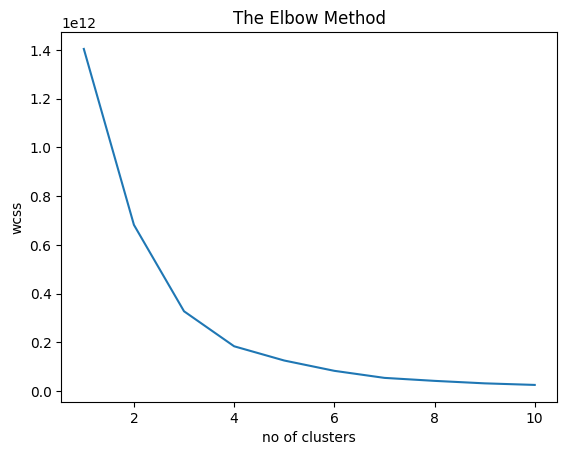

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
kmeansmodel = KMeans(n_clusters=4, init='k-means++', random_state=0)
y_kmeans=kmeansmodel.fit(X)
y_pred = y_kmeans.predict(X)
print(np.unique(kmeansmodel.labels_))

[0 1 2 3]


In [ ]:
from sklearn.metrics import silhouette_score

# clusters = y_kmeans
silhouette_avg = silhouette_score(X, y_pred)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5442113874941122


##### mean analysis to intrepret the cluster

In [ ]:
cluster_means = df_new.groupby('Cluster').mean()

In [ ]:
cluster_means

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,joined_days,Age,Children,Family_Size,Is_Parent,Living_With_Alone,Living_With_Partner
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.612676,54215.970695,49.765258,317.807512,20.985915,114.769953,28.529343,20.247653,47.732394,3.044601,...,2.464789,6.410798,5.501174,4324.138498,58.131455,1.177230,2.819249,0.863850,0.357981,0.642019
1,0.533003,79468.990099,48.945545,632.993399,59.800330,422.003300,86.602310,63.585809,72.145215,1.509901,...,5.661716,8.372937,3.031353,4309.780528,56.264026,0.387789,2.028053,0.334983,0.359736,0.640264
2,0.671355,29007.196931,48.521739,33.823529,6.135550,26.150895,9.295396,6.185422,18.185422,2.172634,...,0.552430,3.112532,6.886189,4318.588235,51.164962,1.139386,2.790281,0.847826,0.349105,0.650895


In [ ]:
kmeansmodel = KMeans(n_clusters=2, init='k-means++', random_state=0)
y_kmeans=kmeansmodel.fit(x)

print(np.unique(kmeansmodel.labels_))
from sklearn.metrics import silhouette_score

# clusters = y_kmeans
silhouette_avg = silhouette_score(X, df_new['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

[0 1]
Silhouette Score: 0.5378975525621019
